In [183]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape, add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import regularizers
from skimage.util import random_noise
import cv2
import keras
import os
from wand.image import Image
import pickle
from keras.models import model_from_json

In [184]:
tf.__version__

'2.4.1'

In [185]:
PATH=r'C:\Users\Pratham Agarwal\Downloads\Dataset\train_cleaned'

In [186]:
PATH2=r'C:\Users\Pratham Agarwal\Downloads\Dataset\test'

In [187]:
directory=os.listdir(PATH)
directory

['train_cleaned']

In [188]:

X_train=[]
y_train=[]
for folder in directory:
    folders=os.listdir("{}\{}".format(PATH,folder))
#     print(folders)
    for file in folders:
        img=cv2.imread("{}\{}\{}".format(PATH,folder,file),0)
        try:
            img=cv2.resize(img,(256,256))
            X_train.append(img)
        except:
            pass
    

In [189]:
directory=os.listdir(PATH2)
y_train=[]
for folder in directory:
    folders=os.listdir("{}\{}".format(PATH2,folder))
#     print(folders)
    for file in folders:
        img=cv2.imread("{}\{}\{}".format(PATH2,folder,file),0)
        try:
            img=cv2.resize(img,(256,256))
            y_train.append(img)
        except:
            pass

In [190]:
# cifar=keras.datasets.cifar10

In [191]:
# (X_train,y_train),(X_test,y_test)=cifar.load_data()

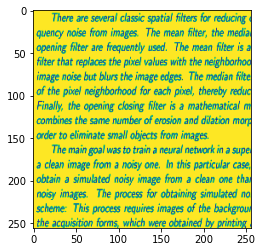

In [192]:
plt.imshow(X_train[56])

In [193]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_train.shape

(144, 256, 256)

In [194]:
X_train.shape

(144, 256, 256)

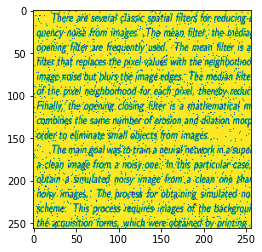

In [195]:

noise_img = random_noise(X_train[56], mode='s&p',amount=0.05)
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Display the noise image
plt.imshow(noise_img)

In [196]:
noise=[]
for img in X_train:
    noise_img = random_noise(img, mode='s&p',amount=0.3)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    noise.append(noise_img)
    

In [197]:
noise=np.array(noise)

In [198]:
noise.shape

(144, 256, 256)

In [199]:
y_train=y_train/255.0

In [200]:
X_train = X_train/255.0

In [201]:
y_train.shape

(72, 256, 256)

In [202]:
shape=X_train.shape
X_train.shape

(144, 256, 256)

In [203]:
X_train=X_train.reshape(shape[0],shape[1],shape[2],1)
noise=noise.reshape(shape[0],shape[1],shape[2],1)
y_train=y_train.reshape(72,shape[1],shape[2],1)

In [204]:
X_train.shape

(144, 256, 256, 1)

In [205]:
noise.shape

(144, 256, 256, 1)

In [206]:
y_train.shape

(72, 256, 256, 1)

In [207]:
model=Sequential()

In [218]:
input_img = keras.Input(shape=(256, 256, 1))
    #encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv_1')(input_img)
x = MaxPooling2D((2, 2), padding='same', name = 'MaxPool_1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv_2')(x)
encoded = MaxPooling2D((2, 2), padding='same', name = 'MaxPool_2')(x)
#decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv_3')(encoded)
x = UpSampling2D((2, 2), name = 'UpSample_1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv_4')(x)
x = UpSampling2D((2, 2), name = 'UpSample_2')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adamax', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 128, 128, 64)      0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 128, 128, 64)      36928     
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 64, 64, 64)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 64, 64, 64)        36928     
_________________________________________________________________
UpSample_1 (UpSampling2D)    (None, 128, 128, 64)      0   

In [167]:
autoencoder.fit(y_train, X_train,
                epochs=200,
                batch_size=15,
                shuffle=True)

Epoch 1/200
10/10 [==============================] - 37s 4s/step - loss: 0.5222
Epoch 2/200
10/10 [==============================] - 37s 4s/step - loss: 0.3666
Epoch 3/200
10/10 [==============================] - 36s 4s/step - loss: 0.3554
Epoch 4/200
10/10 [==============================] - 35s 3s/step - loss: 0.3529
Epoch 5/200
10/10 [==============================] - 38s 4s/step - loss: 0.3426
Epoch 6/200
10/10 [==============================] - 37s 4s/step - loss: 0.3281
Epoch 7/200
10/10 [==============================] - 39s 4s/step - loss: 0.3021
Epoch 8/200
10/10 [==============================] - 41s 4s/step - loss: 0.2777
Epoch 9/200
10/10 [==============================] - 42s 4s/step - loss: 0.2690
Epoch 10/200
10/10 [==============================] - 40s 4s/step - loss: 0.2630
Epoch 11/200
10/10 [==============================] - 42s 4s/step - loss: 0.2603
Epoch 12/200
10/10 [==============================] - 43s 4s/step - loss: 0.2570
Epoch 13/200
10/10 [=================

In [168]:
noise.shape

(144, 256, 256, 1)

In [169]:
noise_img = random_noise(y_train[87], mode='s&p',amount=0.05)
noise_img = np.array(255*noise_img, dtype = 'uint8')
# noise_img = cv2.add(X_train[56],gauss,dtype=cv2.CV_64F)

In [170]:
noise_img.shape

(256, 256, 1)

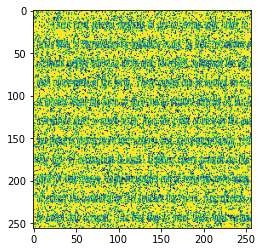

In [222]:

img=autoencoder.predict(noise[6].reshape(1,256,256,1))
plt.imshow(noise[6].reshape(256,256))

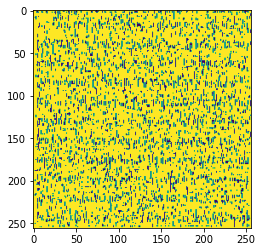

In [223]:
# img=img*255.0
img=img.reshape(256,256)
plt.imshow(img)

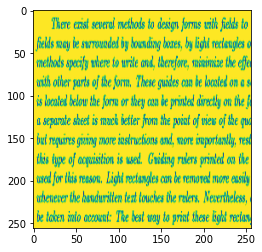

In [224]:
plt.imshow(X_train[6].reshape(256,256))

In [211]:
json_model = autoencoder.to_json()
json_file = open(r'C:\Users\Pratham Agarwal\Downloads\Dataset\textOriginalNoiseEncoder.json', 'w')
json_file.write(json_model)

# saving model weights
autoencoder.save_weights(r'C:\Users\Pratham Agarwal\Downloads\Dataset\textOriginalNoiseEncoder_weights.h5')
 
# loading weights of a keras model


In [214]:
json_file = open(r'C:\Users\Pratham Agarwal\Downloads\Dataset\autoencoder_json.json', 'r')
json_model = model_from_json(json_file.read())
json_model.load_weights(r'C:\Users\Pratham Agarwal\Downloads\Dataset\autoencoder_weights.h5')


In [215]:
index=42

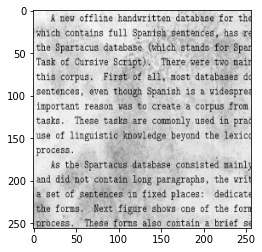

In [216]:

img=json_model.predict(y_train[index].reshape(1,256,256,1))
plt.imshow(y_train[index].reshape(256,256),cmap='gray')

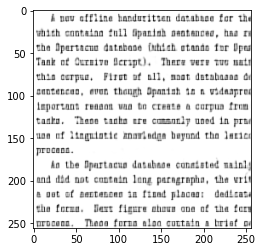

In [217]:
plt.imshow(img.reshape(256,256),cmap='gray')